In [4]:
import numpy as np
import json
import tensorflow.keras as K
import tensorflow as tf
# import cv2
from PIL import Image

In [5]:
import pandas as pd
import json


In [6]:

!cd /Users/markwhite/code/aliciademorauk/malari_eye/
!pwd

/Users/markwhite/code/aliciademorauk/malari_eye/notebooks


In [7]:
from sklearn.utils import shuffle

X_train = np.load('/Users/markwhite/code/aliciademorauk/malari_eye/malaria/train_test_data/200images/training_COL_X_21778.npy')
y_train = np.load('/Users/markwhite/code/aliciademorauk/malari_eye/malaria/train_test_data/200images/training_COL_y_21778.npy')
X, y = shuffle(X_train, y_train)
X_eval = X[-3000:]
y_eval = y[-3000:]
X_train = X[0:-3000]
y_train = y[0:-3000]

X_test =  np.load('/Users/markwhite/code/aliciademorauk/malari_eye/malaria/train_test_data/200images/test_COL_X_5326.npy')
y_test =  np.load('/Users/markwhite/code/aliciademorauk/malari_eye/malaria/train_test_data/200images/test_COL_y_5326.npy')


In [8]:
print( X_train.shape, y_train.shape,
      X_eval.shape, y_eval.shape, 
        X_test.shape,  y_test.shape)



(18778, 200, 200, 3) (18778,) (3000, 200, 200, 3) (3000,) (5326, 200, 200, 3) (5326,)


In [9]:
np.unique(y_train, return_counts= True)

(array(['gametocyte', 'red blood cell', 'ring', 'schizont', 'trophozoite'],
       dtype='<U14'),
 array([   98, 17256,   285,   119,  1020]))

In [10]:
# with open('/Users/markwhite/code/aliciademorauk/malari_eye/malaria/train_test_data/training_COL_X_21745.npy',) as f_in: 
#     X_train = np.load(f_in)

# with open('/Users/markwhite/code/aliciademorauk/malari_eye/malaria/train_test_data/test_COL_X_5279.npy') as f_in:
#     X_test = np.load(f_in)
    
# with open('/Users/markwhite/code/aliciademorauk/malari_eye/malaria/train_test_data/training_COL_y_21745.npy') as f_in: 
#     y_train = np.load(f_in)

# with open('/Users/markwhite/code/aliciademorauk/malari_eye/malaria/train_test_data/test_COL_y_5279.npy') as f_in:
#     y_test = np.load(f_in) 

In [11]:

# with open('data/malaria/training.json') as f_in:
#     data_train = json.load(f_in)

# with open('data/malaria/test.json') as f_in:
#     data_test = json.load(f_in)


In [12]:
# cells_train_df = {
#     'path':[],
#     'min_r':[],
#     'min_c':[],
#     'max_r':[],
#     'max_c':[],
#     'r_len':[],
#     'c_len':[],
#     'category':[]
# }
# for image in data_train:    
#     #Populate cells_df dict
#     for box in image['objects']:
#         cells_train_df['path'].append(image['image']['pathname'])
#         cells_train_df['min_r'].append(box['bounding_box']['minimum']['r'])
#         cells_train_df['min_c'].append(box['bounding_box']['minimum']['c'])
#         cells_train_df['max_r'].append(box['bounding_box']['maximum']['r'])
#         cells_train_df['max_c'].append(box['bounding_box']['maximum']['c'])
#         cells_train_df['r_len'].append(box['bounding_box']['maximum']['r']-box['bounding_box']['minimum']['r'])
#         cells_train_df['c_len'].append(box['bounding_box']['maximum']['c']-box['bounding_box']['minimum']['c'])
#         cells_train_df['category'].append(box['category'])

In [13]:
# cells_test_df = {
#     'path':[],
#     'min_r':[],
#     'min_c':[],
#     'max_r':[],
#     'max_c':[],
#     'r_len':[],
#     'c_len':[],
#     'category':[]
# }
# for image in data_test:    
#     #Populate cells_df dict
#     for box in image['objects']:
#         cells_test_df['path'].append(image['image']['pathname'])
#         cells_test_df['min_r'].append(box['bounding_box']['minimum']['r'])
#         cells_test_df['min_c'].append(box['bounding_box']['minimum']['c'])
#         cells_test_df['max_r'].append(box['bounding_box']['maximum']['r'])
#         cells_test_df['max_c'].append(box['bounding_box']['maximum']['c'])
#         cells_test_df['r_len'].append(box['bounding_box']['maximum']['r']-box['bounding_box']['minimum']['r'])
#         cells_test_df['c_len'].append(box['bounding_box']['maximum']['c']-box['bounding_box']['minimum']['c'])
#         cells_test_df['category'].append(box['category'])

In [14]:
# cells_train_df = pd.DataFrame(cells_train_df)
# cells_test_df = pd.DataFrame(cells_test_df)

In [15]:
# indexes = cells_train_df[cells_train_df.category == 'red blood cell'].index
# cells_train_df = cells_train_df.drop(indexes)

In [16]:
# indexes = cells_test_df[cells_test_df.category == 'red blood cell'].index
# cells_test_df = cells_test_df.drop(indexes)

In [17]:
# cells_arr_train = []
# labels_train = []
# for index, row in cells_train_df.iterrows():
#     full_image = cv2.imread(f"data/malaria{row['path']}")
#     min_r, max_r = row['min_r'], row['max_r']
#     min_c, max_c = row['min_c'], row['max_c']
#     boxed_image = Image.fromarray(full_image[min_r:max_r, min_c:max_c, :], 'RGB').resize((200,200))
#     cells_arr_train.append(np.array(boxed_image))
#     labels_train.append(row['category'])

In [18]:
# cells_arr_test = []
# labels_test = []
# for index, row in cells_test_df.iterrows():
#     full_image = cv2.imread(f"data/malaria{row['path']}")
#     min_r, max_r = row['min_r'], row['max_r']
#     min_c, max_c = row['min_c'], row['max_c']
#     boxed_image = Image.fromarray(full_image[min_r:max_r, min_c:max_c, :], 'RGB').resize((200,200))
#     cells_arr_test.append(np.array(boxed_image))
#     labels_test.append(row['category'])

In [19]:
# X_train = np.array(cells_arr_train)
# y_train = np.array(labels_train)
# X_test = np.array(cells_arr_test)
# y_test = np.array(labels_test)

In [20]:
from sklearn.preprocessing import OneHotEncoder
def preprocess_data(X, Y):
    """trains a convolutional neural network to classify the dataset"""
    X_p = K.applications.resnet50.preprocess_input(X)
    ohe = OneHotEncoder(sparse_output=False)
    Y_p = ohe.fit_transform(Y.reshape(-1,1))
    return X_p, Y_p

In [21]:
trainX = K.applications.resnet50.preprocess_input(X_train)
evalX = X_p = K.applications.resnet50.preprocess_input(X_eval)


In [22]:
ohe = OneHotEncoder(sparse_output=False)
trainy = ohe.fit_transform(y_train.reshape(-1,1))
evaly = ohe.transform(y_eval.reshape(-1,1))

In [23]:
trainy

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [24]:
inputs = K.Input(shape=(200, 200, 3))
#Loading the ResNet50 model with pre-trained ImageNet weights
resnet = K.applications.ResNet50(weights='imagenet',include_top=False,input_tensor=inputs)

In [25]:
for layer in resnet.layers[:170]:
   layer.trainable = False

In [28]:
model = K.models.Sequential()
# model.add(K.layers.Lambda(lambda x: tf.image.resize(x,(200, 200))))
model.add(resnet)
model.add(K.layers.GlobalAveragePooling2D())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(256, activation='relu'))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dropout(0.3))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(64, activation='relu'))
model.add(K.layers.Dropout(0.3))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(5, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',
     optimizer=K.optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])
checkpointer = K.callbacks.ModelCheckpoint(filepath='cifar10.h5',
     monitor="val_accuracy", verbose=1, save_best_only=True)
model.fit(trainX, trainy, batch_size=32, epochs=10, verbose=1,
     callbacks=[checkpointer],validation_data=(evalX, evaly), shuffle=True)

KeyboardInterrupt: 

In [91]:
testX, testy = preprocess_data(X_test, y_test) 

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(testX)


165/165 [==============================] - 49s 298ms/step


In [119]:
lab = dict(zip(np.unique(np.argmax(testy, axis=1)), 
        ohe.get_feature_names_out()))
lab

{0: 'x0_gametocyte',
 1: 'x0_red blood cell',
 2: 'x0_ring',
 3: 'x0_schizont',
 4: 'x0_trophozoite'}

In [ ]:

np.argmax(testy,axis=1)

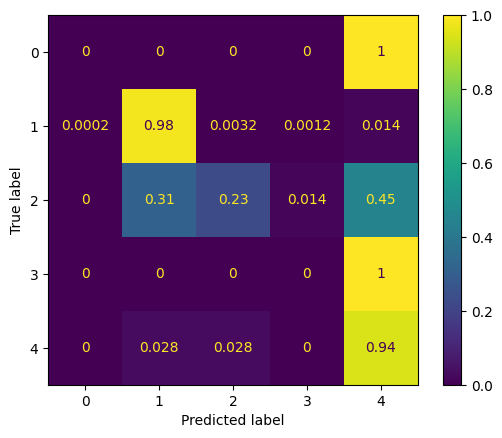

In [121]:
cm = confusion_matrix(np.argmax(testy,axis=1), 
                    np.argmax(y_pred,axis=1),
                    # labels = lab,
                    normalize='true') 
dist = ConfusionMatrixDisplay(cm)
dist.plot()

In [ ]:
'gametocyte', 'red blood cell', 'ring', 'schizont', 'trophozoite'


In [100]:
ohe.get_feature_names_out()

array(['x0_gametocyte', 'x0_red blood cell', 'x0_ring', 'x0_schizont',
       'x0_trophozoite'], dtype=object)